<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# 02 - Practical exercise - Solution - Satellite II

### About

> Satellite data is also useful for understanding seasonal cycles for dust monitoring. In this session, we will use monthly IASI Level 3 Dust Aerosol Optical Depth (AOD) and Dust Aerosol Layer Height (ALH) data from January to December 2021 to create global maps of dust activity. One year is used as an illustration for how to get and use this data.


### Tasks

#### 1. Brainstorm
  * What is the difference between Level 2 and Level 3 data?
  * What are some advantages and limitations of using satellite data to monitor dust activity?

#### 2. Download and open `Dust aerosol optical depth` data from [C3S Aerosol properties gridded data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-aerosol-properties?tab=overview) for the IASI instrument on MetOp-C.
  * Download the C3S Aerosol properties gridded data from January to December 2021, with the following specifications:
    > Time aggregation: `Monthly average` <br>
    > Variable on single levels: `Dust aerosol optical depth` <br>
    > Sensor on satellite: `IASI on METOPC` <br> 
    > Algorithm: `LMD (Laboratoire de Météorologie Dynamique)` <br>
    > Year: `2021` <br>
    > Month: Click on `Select all` <br>
    > Version: select `IASI` and then `v2.2` <br>
    > Orbit: `Descending` <br>
    > Format: `Zip file (.zip)` <br>
  * **Hint** 
    * [C3S Aerosol properties gridded data - Example notebook](../04_data_workflows/41_satellite_observations/418_C3S_aerosol_properties_L3_load_browse.ipynb)
    * [Data access](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-aerosol-properties?tab=form)

#### 3. Create an animation showing global maps of Dust AOD.

#### 4. Load and browse `Dust aerosol layer height` data from [C3S Aerosol properties gridded data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-aerosol-properties?tab=overview) for the IASI instrument on MetOp-C.
  * The variable of interest is `Mean_dust_layer_altitude`

#### 5. Create an animation showing global maps of Dust aerosol layer height.

#### 6. [BONUS] Download `Dust aerosol optical depth` data from [C3S Aerosol properties gridded data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-aerosol-properties?tab=overview) for the IASI instrument on MetOp-C produced with a different algorithm and compare the differences.

#### 7. Interpret the results
  * What seasonal cycles do you see in the global maps of Dust AOD over the year?
  * What seasonal cycles do you see in the global maps of Dust aerosol layer height over the year?

<br>

### Module outline
* [1 - Download and open the Dust AOD C3S Aerosol properties gridded data for the IASI instrument on MetOp-C.](#c3s_aod)
* [2 - Create an animation showing global maps of Dust AOD](#animate_aod)
* [3 - Load and browse the Dust aerosol layer height C3S Aerosol properties gridded data for the IASI instrument on MetOp-C.](#c3s_alh)
* [4 - Create an animation showing global maps of Dust aerosol layer height](#animate_alh)
* [5 - BONUS: Download Dust AOD data from C3S Aerosol properties gridded data for the IASI instrument on MetOp-C produced with a different algorithm and compare the differences.](#other)

<hr>

##### Load required libraries

In [1]:
import xarray as xr
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

### <a id='c3s_aod'></a>1. Download the Dust AOD C3S Aerosol properties gridded data for the IASI instrument on MetOp-C

The `CDS Application Program Interface (CDS API)` is a Python library which allows you to access data from the CDS `programmatically`. In order to use the CDS API, follow the steps below:

* [Self-register](https://cds.climate.copernicus.eu/#!/home) at the CDS registration page (if you do not have an account yet)
* [Login](https://cds.climate.copernicus.eu/user/login) to the CDS portal and go to the [api-how-to page](https://cds.climate.copernicus.eu/api-how-to)
* Copy the CDS API key displayed in the black terminal window and replace the `######` of the `KEY` variable below with your individual CDS API key

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab. 

In [6]:
URL='https://cds.climate.copernicus.eu/api/v2'
KEY='#######################################'

Via the [CDS web interface](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-aerosol-properties?tab=form), you can select the data and at the end of the web interface, you can open the CDS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically. 

Note that the code cell below is commented out. You need to delete the `'''` blockquotes to uncomment it for the cell to run.

In [ ]:
'''
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'satellite-aerosol-properties',
    {
        'time_aggregation': 'monthly_average',
        'variable': 'dust_aerosol_optical_depth',
        'sensor_on_satellite': 'iasi_on_metopc',
        'algorithm': 'lmd',
        'year': '2021',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'version': 'v2.2',
        'orbit': 'descending',
        'format': 'zip',
    },
    './metop_c_2021.zip')
'''

C3S aerosol properties gridded data can be retrieved in a `zipped NetCDF` or a `tar-compressed NetCDF`. Above, we requested the data in a zipped NetCDF and for this reason, we have to unzip the file before we can open it. You can unzip `zip archives` in Python with the Python package `zipfile` and the function `extractall()`. You will see 12 new files appearing in a new folder called `metop_c_2021` located in the same folder as this notebook. This is just for demonstration purposes.

In [5]:
#import zipfile
#with zipfile.ZipFile('../../eodata/dust/part2/1_satellite/iasi_c3s/aod/2021/metop_c/metop_c_2021.zip', 'r') as zip_ref:
#    zip_ref.extractall('./metop_c_2021/')

<br>

#### Load and browse the AOD data from MetOp-C

The xarray `open_mfdataset()` function allows the opening of multiple files at once. You have to specify the dimension the files shall be concatenated by. It can be an existing dimension within the data file or a new dimension, which is newly specified.

Let us open the monthly gridded dust aerosol optical depth (AOD) data from IASI on MetOp-C for 2021. We specify `time` as a new dimension that the data files shall be concatenated by. Note: if you want to use the files you just unzipped, you need to change the filepath in the code cells below.


In [6]:
ds_c = xr.open_mfdataset('../../eodata/dust/part2/1_satellite/iasi_c3s/aod/2021/metop_c/*.nc', 
                         concat_dim='time', 
                         combine='nested')
ds_c

<xarray.Dataset>
Dimensions:                   (Longitude: 360, Latitude: 180, time: 12)
Coordinates:
  * Longitude                 (Longitude) float64 -180.0 -179.0 ... 178.0 179.0
  * Latitude                  (Latitude) float64 -90.0 -89.0 -88.0 ... 88.0 89.0
Dimensions without coordinates: time
Data variables:
    Daod10000                 (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod10000_uncertainty     (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod11000                 (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod550                   (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Mean_dust_layer_altitude  (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/44)
    title:                      Dust Aerosol Optical Depth retrieved from IAS...
    Institution:                Laboratoire de meteorologie dynamique (LMD)
    Source:                     IASI L1C (EUMETSAT)
    History:                    20210310- Product generated from LMD v2.2
    References:                 LMDAERO ATBD issue 2.2
    Tracking_id:                fbfddf53-362e-4df0-9943-61f4d967340b
    ...                         ...
    productID:                  202101-C3S-L3_AEROSOL-D_AOD-IASI-METOPC-LMDAE...
    platform:                   METOPC
    sensor:                     IASI
    spatial_resolution:         12 km diameter pixel at nadir
    content:                    Aerosol Optical Depth
    inputFileList:                  20210101-C3S-L3_AEROSOL-D_AOD-IASI-METOPC...

After you loaded the multiple files in a `Dataset` with the function `open_mfdataset()`, you have to select `Daod550` as the variable of interest.

The resulting `xarray.DataArray` has three dimensions (`time`, `Latitude` and `Longitude`).

In [7]:
aod_c=ds_c['Daod550']
aod_c

<xarray.DataArray 'Daod550' (time: 12, Latitude: 180, Longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * Longitude  (Longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * Latitude   (Latitude) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
Dimensions without coordinates: time
Attributes:
    units:        None
    long_name:    Dust optical depth at 0.55 microns
    valid_range:  [0.       1.629221]

#### Retrieve  time coordinate information and assign time coordinates for the time dimension

Having coordinates for `time` will be important for plotting the data as we need to know which month the data is valid. Thus, a next step is to assign coordinates to the `time` dimension.

By inspecting the metadata of a single data file `ds_c` we loaded at the beginning, you can see that the metadata attribute `id` contains the date in the name.

The first step is to retrieve the metadata attribute `id` and to split the resulting string object at the positions with a dash `-`. The month string is the first position of the resulting string.

In [8]:
start_month = ds_c.id.split('-')[0]
start_month

'202101'

With the help of the Python library `pandas`, you can build a `DateTime` time series for the three consecutive days, starting from the `start_month` variable that was defined above.

You can use the `date_range` function from pandas, using the length of the time dimension of the `ds_c` DataArray and `'m'` (for month) as freqency argument. Note that `202101` is in the format `%Y%m`.

The result is a time-series with `DateTime` information from 1 January 2021 to 1 December 2021.

In [9]:
time_coords_c = pd.date_range(datetime.strptime(start_month,'%Y%m'), periods=len(ds_c.time), freq='m').strftime("%Y-%m").astype('datetime64[ns]')
time_coords_c

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq=None)

<br>

The final step is to assign the pandas time series object `time_coords` to the `aod_c` DataArray object, You can use the `assign_coords()` function from xarray.

The result is that the time coordinates have now been assigned values. 

In [10]:
aod_c = aod_c.assign_coords(time=time_coords_c)
aod_c

<xarray.DataArray 'Daod550' (time: 12, Latitude: 180, Longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * Longitude  (Longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * Latitude   (Latitude) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    units:        None
    long_name:    Dust optical depth at 0.55 microns
    valid_range:  [0.       1.629221]

Next, we can fill all `NaN` values with a large negative number to prevent the piling up of pixels in our animation later on. We will use a colormap later that has a white color for values at or below 0.

In [11]:
aod_c = aod_c.fillna(-999)

Above, you see that the variable `aod_c` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used later for visualizing the data.

In [12]:
long_name = aod_c.long_name
units = aod_c.units

Let us do the same for the coordinates `Longitude` and `Latitude`.

In [13]:
latitude = aod_c.Latitude
longitude = aod_c.Longitude

<br>

### <a id='animate_aod'></a>2. Create an animation showing global maps of Dust AOD

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

You can make use of the variables we defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the `color scale` and minimum (`vmin`) and maxium (`vmax`) data values.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Dust optical depth at 0.55 microns 2021-06-01'}>)

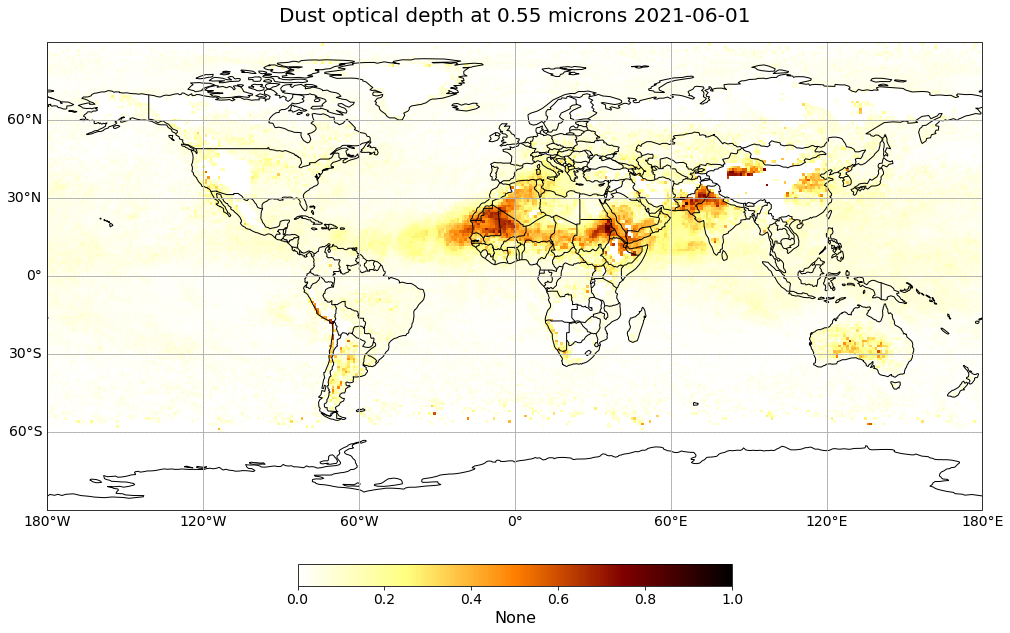

In [14]:
time_index = 5
visualize_pcolormesh(data_array=aod_c[time_index,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='afmhot_r',
                     unit=units,
                     long_name=long_name + ' ' + str(aod_c[time_index,:,:].time.data)[0:10],
                     vmin=0, 
                     vmax=1)

#### Animate the AOD data

The final step is now to animate the `aod_c` DataArray over the 12 months of 2021.

The animation function consists of four parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have. Since we are working with monthly data, we have a total of 12 frames.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [15]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=aod_c[0,:,:],
                               longitude=longitude, 
                               latitude=latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='afmhot_r', 
                               unit=' ',
                               long_name=aod_c.long_name + '/' + str(aod_c.time[0].dt.strftime('%Y-%m-%d').data), 
                               vmin=0, 
                               vmax=1, 
                               set_global=True)

frames = 12

def draw(i):
    img = plt.pcolormesh(longitude, 
                         latitude, 
                         aod_c[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=1)
    ax.set_title(aod_c.long_name + ' ' + str(aod_c.time[i].dt.strftime('%Y-%m-%d').data),
                fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)


<br>

#### Play the animation as HTML5 video

In [16]:
HTML(ani.to_html5_video())

### <a id='c3s_alh'></a>3. Load and browse Dust aerosol layer height C3S Aerosol properties gridded data for the IASI instrument on MetOp-C

#### Load and browse the ALH data from MetOp-C

Let us load and browse the monthly gridded dust aerosol layer height (ALH) data from IASI on MetOp-C for 2021. This variable is available in the same dataset in the variable `ds_c`.


In [17]:
ds_c

<xarray.Dataset>
Dimensions:                   (Longitude: 360, Latitude: 180, time: 12)
Coordinates:
  * Longitude                 (Longitude) float64 -180.0 -179.0 ... 178.0 179.0
  * Latitude                  (Latitude) float64 -90.0 -89.0 -88.0 ... 88.0 89.0
Dimensions without coordinates: time
Data variables:
    Daod10000                 (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod10000_uncertainty     (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod11000                 (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Daod550                   (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    Mean_dust_layer_altitude  (time, Latitude, Longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/44)
    title:                      Dust Aerosol Optical Depth retrieved from IAS...
    Institution:                Laboratoire de meteorologie dynamique (LMD)
    Source:                     IASI L1C (EUMETSAT)
    History:                    20210310- Product generated from LMD v2.2
    References:                 LMDAERO ATBD issue 2.2
    Tracking_id:                fbfddf53-362e-4df0-9943-61f4d967340b
    ...                         ...
    productID:                  202101-C3S-L3_AEROSOL-D_AOD-IASI-METOPC-LMDAE...
    platform:                   METOPC
    sensor:                     IASI
    spatial_resolution:         12 km diameter pixel at nadir
    content:                    Aerosol Optical Depth
    inputFileList:                  20210101-C3S-L3_AEROSOL-D_AOD-IASI-METOPC...

You have to select `Mean_dust_layer_altitude` as the variable of interest.

The resulting `xarray.DataArray` has three dimensions (`time`, `latitude` and `longitude`).

In [18]:
alc_c=ds_c['Mean_dust_layer_altitude']
alc_c

<xarray.DataArray 'Mean_dust_layer_altitude' (time: 12, Latitude: 180, Longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * Longitude  (Longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * Latitude   (Latitude) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
Dimensions without coordinates: time
Attributes:
    units:        km
    long_name:    Mean altitude of the layer
    valid_range:  [0.757    5.649723]

#### Assign time coordinates for the time dimension using `time_coords_c`

The final step is to assign the pandas time series object `time_coords_c` to the `alc_c` DataArray object, You can use the `assign_coords()` function from xarray.

The result is that the time coordinates have now been assigned values. 

In [19]:
alc_c = alc_c.assign_coords(time=time_coords_c)
alc_c

<xarray.DataArray 'Mean_dust_layer_altitude' (time: 12, Latitude: 180, Longitude: 360)>
dask.array<concatenate, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * Longitude  (Longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * Latitude   (Latitude) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    units:        km
    long_name:    Mean altitude of the layer
    valid_range:  [0.757    5.649723]

Next, we can fill all `NaN` values with a large negative number to prevent the piling up of pixels in our animation later on. We will use a colormap later that has a white color for values at or below 0.

In [20]:
alc_c = alc_c.fillna(-999)

Above, you see that the variable `alc_c` has two attributes, `units` and `long_name`. Let us define variables for those attributes. The variables can be used later for visualizing the data.

In [21]:
long_name = alc_c.long_name
units = alc_c.units

For plotting, we can re-use the same variables `latitude` and `longitude` from earlier as the dust ALH are on the same grid as the dust AOD data.

<br>

### <a id='animate_alh'></a>4. Create an animation showing global maps of Dust aerosol layer height

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

You can make use of the variables we defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the `color_scale` and minimum (`vmin`) and maxium (`vmax`) data values.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Mean altitude of the layer 2021-07-01'}>)

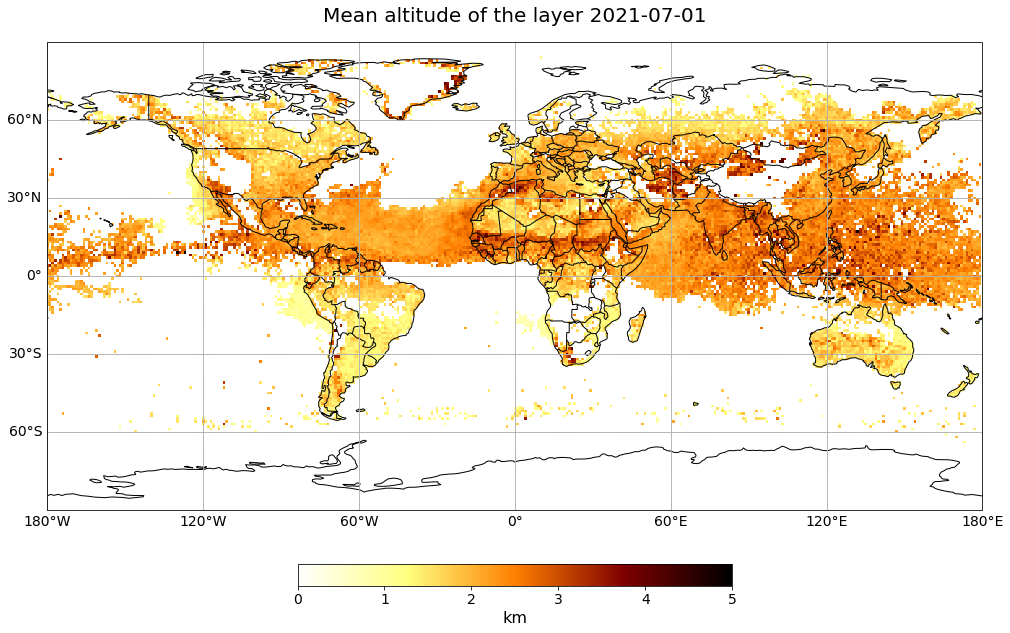

In [22]:
time_index = 6
visualize_pcolormesh(data_array=alc_c[time_index,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='afmhot_r',
                     unit=units,
                     long_name=long_name + ' ' + str(alc_c[time_index,:,:].time.data)[0:10],
                     vmin=0, 
                     vmax=5)

#### Animate the ALH data

The final step is now to animate the `alc_c` DataArray over the 12 months of 2021.

The animation function consists of four parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have. Since we are working with monthly data, we have a total of 12 frames.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [23]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=alc_c[0,:,:],
                               longitude=longitude, 
                               latitude=latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='afmhot_r', 
                               unit=units,
                               long_name=long_name + '/' + str(alc_c.time[0].dt.strftime('%Y-%m-%d').data), 
                               vmin=0, 
                               vmax=5, 
                               set_global=True)

frames = 12

def draw(i):
    img = plt.pcolormesh(longitude, 
                         latitude, 
                         alc_c[i,:,:], 
                         cmap='afmhot_r', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=5)
    ax.set_title(long_name + ' ' + str(alc_c.time[i].dt.strftime('%Y-%m-%d').data),
                fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)


<br>

#### Play the animation as HTML5 video

In [24]:
HTML(ani.to_html5_video())

### <a id='other'></a>5. [BONUS] Download Dust AOD data from C3S Aerosol properties gridded data for the IASI instrument on MetOp-C produced with a different algorithm and compare the differences.

The steps are the same as the above workflow for Part 1 and 2. The only thing you have to change is the algorithm used during the download. See below for an example where changed the algorithm in the download code to `ulb`.

In [25]:
'''
import cdsapi

c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'satellite-aerosol-properties',
    {
        'time_aggregation': 'monthly_average',
        'variable': 'dust_aerosol_optical_depth',
        'sensor_on_satellite': 'iasi_on_metopc',
        'algorithm': 'ulb',
        'year': '2021',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'version': 'v2.2',
        'orbit': 'descending',
        'format': 'zip',
    },
    './metop_c_2021.zip')
'''

"\nimport cdsapi\n\nc = cdsapi.Client(url=URL, key=KEY)\n\nc.retrieve(\n    'satellite-aerosol-properties',\n    {\n        'time_aggregation': 'monthly_average',\n        'variable': 'dust_aerosol_optical_depth',\n        'sensor_on_satellite': 'iasi_on_metopc',\n        'algorithm': 'ulb',\n        'year': '2021',\n        'month': [\n            '01', '02', '03',\n            '04', '05', '06',\n            '07', '08', '09',\n            '10', '11', '12',\n        ],\n        'version': 'v2.2',\n        'orbit': 'descending',\n        'format': 'zip',\n    },\n    './metop_c_2021.zip')\n"

<br>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>